In [1]:
import matplotlib.pyplot as plt

In [2]:
import pickle
import numpy as np
import tools
from pylab import *
import matplotlib.animation as animation
import matplotlib as mpl

In [3]:
import numpy as np
import os
import standard.analysis as sa
import tools
import matplotlib.pyplot as plt
import task
import tensorflow as tf
from model import FullModel

C:\Users\Peter\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
%matplotlib inline 

In [5]:
mpl.rcParams['font.size'] = 15
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'arial'

In [129]:
path = 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50'
x = tools.load_all_results(path, argLast=True)

sparsity = np.array([y.mean() for y in x['sparsity']])
badKC = np.array([np.sum(y == 0)/y.size for y in x['sparsity']])
accuracy = x['train_acc']
histogram = x['log_hist']
linehist = x['hist']
threshold = x['thres']
lrs = x['lr']
nkcs = x['N_KC']
loss = x['train_loss']
logloss = np.log(loss)

['files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000000', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000001', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000002', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000003', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000004', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000005', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000006', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000007', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000008', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000009', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000010', 'files/cluster_10_pn_untrainable_bias/cluster_10_pn_untrainable_bias50\\000011', 'files/cluster_10_pn_untrai

In [130]:
wglos = tools.load_pickle(path, 'w_glo')

In [131]:
wglos[15].shape

(50, 20000)

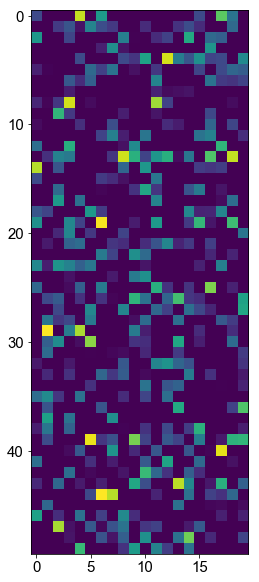

In [132]:
plt.figure(figsize=(20,10))
plt.imshow(wglos[21][:,:20], vmin=0, vmax = .5)

In [133]:
ind = np.logical_and(accuracy > .55, badKC < .05)

In [134]:
accuracy

array([0.578125  , 0.63671875, 0.4296875 , 0.07421875, 0.65625   ,
       0.75      , 0.69140625, 0.72265625, 0.7265625 , 0.78125   ,
       0.82421875, 0.88671875, 0.7265625 , 0.80078125, 0.83203125,
       0.85546875, 0.69921875, 0.78125   , 0.88671875, 0.8515625 ,
       0.6875    , 0.76171875, 0.7265625 , 0.69921875], dtype=float32)

In [135]:
histogram.shape

(24, 200)

In [136]:
sparsity_ = sparsity[ind]
badKC_ = badKC[ind]
accuracy_ = accuracy[ind]
threshold_ = threshold[ind]
lrs_ = lrs[ind]
nkcs_ = nkcs[ind]

w_bins = (np.linspace(-20, 5, 201))[:-1]

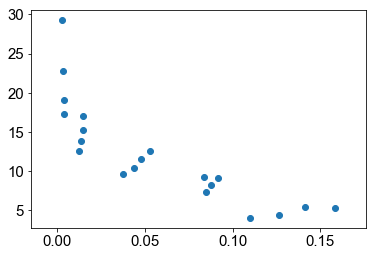

In [137]:
plt.scatter(threshold_, sparsity_)

In [138]:
sparsity_

array([ 5.2924 ,  5.4436 ,  4.421  ,  4.01305,  7.2956 ,  8.2018 ,
        9.2325 ,  9.07365,  9.5536 , 10.4142 , 11.4874 , 12.5444 ,
       12.6084 , 13.842  , 15.2431 , 17.07655, 17.342  , 19.0778 ,
       22.8056 , 29.24785])

In [139]:
lrs_

array([1.e-03, 1.e-03, 1.e-03, 1.e-03, 3.e-04, 3.e-04, 3.e-04, 3.e-04,
       1.e-04, 1.e-04, 1.e-04, 1.e-04, 3.e-05, 3.e-05, 3.e-05, 3.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05])

In [140]:
nkcs_

array([ 2500,  5000, 10000, 20000,  2500,  5000, 10000, 20000,  2500,
        5000, 10000, 20000,  2500,  5000, 10000, 20000,  2500,  5000,
       10000, 20000])

(0, 500000.0)

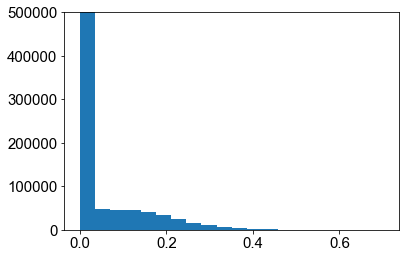

In [141]:
plt.hist(wglos[15].flatten(), bins=20)
plt.ylim([0, 5e5])

In [48]:
lrs

array([3.e-03, 3.e-03, 3.e-03, 3.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03,
       3.e-04, 3.e-04, 3.e-04, 3.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       3.e-05, 3.e-05, 3.e-05, 3.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05])

In [49]:
nkcs

array([ 2500,  5000, 10000, 20000,  2500,  5000, 10000, 20000,  2500,
        5000, 10000, 20000,  2500,  5000, 10000, 20000,  2500,  5000,
       10000, 20000,  2500,  5000, 10000, 20000])

In [50]:
np.where(ind)

(array([10, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23], dtype=int64),)

In [51]:
logloss

array([ 1.3925363 ,  1.4170959 ,  1.4215194 ,  1.4545724 ,  1.0123228 ,
        0.9598171 ,  0.9239714 ,  1.2785659 ,  0.62980026,  0.4576312 ,
        0.34019992,  0.33074436,  0.40044397,  0.16942056, -0.03840227,
       -0.12493706,  0.3068477 ,  0.13033995, -0.15852971, -0.44243953,
        0.48894057,  0.12339605, -0.1459016 , -0.48008657], dtype=float32)

In [52]:
sparsity_

array([ 3.5348 , 29.7736 , 21.7536 , 16.7603 , 13.48965, 53.9668 ,
       47.999  , 45.8585 , 44.2981 , 65.5406 , 70.5083 , 77.4235 ])

In [24]:
accuracy

array([0.0703125 , 0.0859375 , 0.06640625, 0.0546875 , 0.296875  ,
       0.29296875, 0.35546875, 0.1328125 , 0.4453125 , 0.52734375,
       0.55859375, 0.6015625 , 0.5625    , 0.61328125, 0.640625  ,
       0.68359375, 0.6015625 , 0.625     , 0.71484375, 0.7734375 ,
       0.53515625, 0.6640625 , 0.71875   , 0.8203125 ], dtype=float32)

In [25]:
lrs_

array([3.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04, 3.e-05, 3.e-05, 3.e-05,
       3.e-05, 1.e-05, 1.e-05, 1.e-05])

In [26]:
nkcs_

array([10000,  2500,  5000, 10000, 20000,  2500,  5000, 10000, 20000,
        5000, 10000, 20000])

In [27]:
np.round(threshold_,3)

array([0.079, 0.016, 0.02 , 0.025, 0.031, 0.006, 0.008, 0.009, 0.01 ,
       0.003, 0.004, 0.004])

In [28]:
np.sum(wglos[9] > .05, axis=0).mean()

5.1544

In [29]:
np.round(sparsity_)

array([ 4., 30., 22., 17., 13., 54., 48., 46., 44., 66., 71., 77.])

In [30]:
threshold_

array([0.07885965, 0.01585151, 0.02002488, 0.02460159, 0.0313736 ,
       0.00623665, 0.00777555, 0.00874807, 0.01046166, 0.00317188,
       0.00358633, 0.00376597])

In [31]:
accuracy_

array([0.55859375, 0.5625    , 0.61328125, 0.640625  , 0.68359375,
       0.6015625 , 0.625     , 0.71484375, 0.7734375 , 0.6640625 ,
       0.71875   , 0.8203125 ], dtype=float32)

In [32]:
ind

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True])

In [33]:
nkcs

array([ 2500,  5000, 10000, 20000,  2500,  5000, 10000, 20000,  2500,
        5000, 10000, 20000,  2500,  5000, 10000, 20000,  2500,  5000,
       10000, 20000,  2500,  5000, 10000, 20000])

In [34]:
lrs

array([3.e-03, 3.e-03, 3.e-03, 3.e-03, 1.e-03, 1.e-03, 1.e-03, 1.e-03,
       3.e-04, 3.e-04, 3.e-04, 3.e-04, 1.e-04, 1.e-04, 1.e-04, 1.e-04,
       3.e-05, 3.e-05, 3.e-05, 3.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05])

([<matplotlib.axis.YTick at 0x1f8b45574a8>,
 <a list of 6 Text yticklabel objects>)

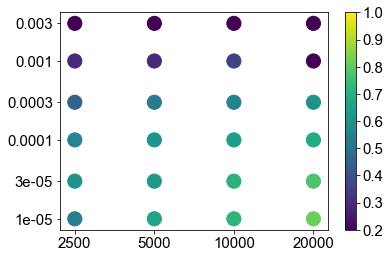

In [35]:
scat = plt.scatter(np.log(nkcs), np.log(lrs), c=accuracy, s=200, vmin=.2, vmax=1)
plt.colorbar(scat)
plt.xticks(np.unique(np.log(nkcs)), np.unique(nkcs))
plt.yticks(np.unique(np.log(lrs)), np.unique(lrs))